<a href="https://colab.research.google.com/github/yhy0519/Project_of_Python/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경칭정리 다시하기
https://predictors.tistory.com/3 참고



# **■ 머신러닝 데이터 분석을 하기 위한 단계?**

 1. 데이터 불러오기
 2. 데이터 탐색 및 전처리   --->   결측치 처리
 3. 범주형 변수 더미변수(인코딩)로 변환 (파이썬)
 4. 데이터 정규화 또는 표준화  --->  이상치에 민감하지 않도록 단위를 일정하게 조정
 5. 훈련 데이터와 테스트 데이터 분
 6. 머신러닝 모델 생성
 7. 훈련 데이터로 머신러닝 모델 훈련
 8. 머신러닝 모델 평가
 9. 머신러닝 모델 성능 개선

In [386]:
## 1. 데이터 불러오기
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/data/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data/titanic/test.csv')

In [387]:
# 열이름 소문자로 바꾸기
df_train.columns = map(str.lower, df_train.columns)

In [388]:
## 2. 데이터 탐색 및 전처리
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [389]:
# 데이터 확인
print('Training Set Dataframe Shape: ', df_train.shape)
print('Test Set Dataframe Shape: ', df_test.shape)

Training Set Dataframe Shape:  (891, 12)
Test Set Dataframe Shape:  (418, 11)


In [390]:
# 결측치 확인
df_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [391]:
# age 변수
df_train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

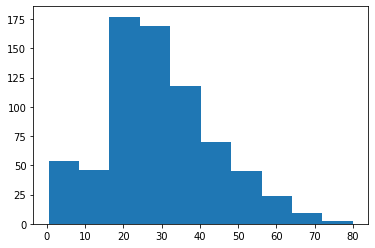

In [392]:
# age 변수 히스토그램
import matplotlib.pyplot as plt

plt.hist(df_train['age'])
plt.show()

In [393]:
# age 변수 결측치 평균값으로 치환
mean_age = df_train['age'].mean()
print(mean_age)   # 29.69911764705882
print(df_train.age.isnull().sum())  # 177

df_train['age'].fillna(mean_age, inplace=True)
print(df_train.age.isnull().sum())   # 0

29.69911764705882
177
0


In [394]:
# cabin 변수
df_train['cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: cabin, Length: 891, dtype: object

In [395]:
df_train['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [396]:
# cabin 변수 결측치 이웃하고 있는 주변의 데이터로 누락 데이터를 바꾸기
print(df_train.cabin.isnull().sum())  # 687
df_train['cabin'].fillna(method='bfill', inplace=True)  # 결측치 아래의 데이터로 채워넣는다.
df_train['cabin'].fillna(method='ffill', inplace=True)  # 결측치 위의 데이터로 채워넣는다.
print(df_train.cabin.isnull().sum())  # 0

687
0


In [397]:
# embarked 변수
df_train['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [398]:
df_train['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [399]:
# embarked 변수 결측치 가장 많이 출현한 값으로 치환
df_train['embarked'].value_counts(dropna=True)

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [400]:
print(df_train.embarked.isnull().sum())  # 2
most_freq = df_train['embarked'].value_counts(dropna=True).idxmax()   
df_train['embarked'].fillna(most_freq, inplace=True)
print(df_train.embarked.isnull().sum())  # 0

2
0


In [401]:
print(df_train.isnull().sum())

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64


In [402]:
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [403]:
# 분석에 활용할 열(속성)을 선택 
df_train2 = df_train[['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
print(df_train2.head())

   survived  pclass  ...     fare embarked
0         0       3  ...   7.2500        S
1         1       1  ...  71.2833        C
2         1       3  ...   7.9250        S
3         1       1  ...  53.1000        S
4         0       3  ...   8.0500        S

[5 rows x 9 columns]


In [404]:
# 경칭 정리 (https://rfriend.tistory.com/448, https://blog.naver.com/wideeyed/221603778414 참고)
df_train2['title'] = (df_train2.name.str.split(',').str[1]).str.split('.').str[0]    # expand=True 이면 여러개 컬럼으로 분할
print(df_train2.title.unique())             

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [405]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(df_train2['sex'], drop_first=True)
df_train2 = pd.concat([df_train2, onehot_sex], axis=1)
df_train2.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title,male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1


In [406]:
onehot_embarked = pd.get_dummies(df_train2['embarked'], prefix='town', drop_first=True)
df_train2 = pd.concat([df_train2, onehot_embarked], axis=1)
df_train2.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title,male,town_Q,town_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,0,1


In [407]:
onehot_title = pd.get_dummies(df_train2['title'], prefix='title', drop_first=True)
df_train2 = pd.concat([df_train2, onehot_title], axis=1)
df_train2.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title,male,town_Q,town_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [408]:
onehot_title = pd.get_dummies(df_train2['pclass'], prefix='pclass', drop_first=True)
df_train2 = pd.concat([df_train2, onehot_title], axis=1)
df_train2.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title,male,town_Q,town_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,pclass_2,pclass_3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [409]:
df_train2.drop(['name', 'title', 'sex', 'embarked', 'pclass'], axis=1, inplace=True)
df_train2.head()

,survived,age,sibsp,parch,fare,male,town_Q,town_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [410]:
df_train2.dtypes

survived                 int64
age                    float64
sibsp                    int64
parch                    int64
fare                   float64
male                     uint8
town_Q                   uint8
town_S                   uint8
title_ Col               uint8
title_ Don               uint8
title_ Dr                uint8
title_ Jonkheer          uint8
title_ Lady              uint8
title_ Major             uint8
title_ Master            uint8
title_ Miss              uint8
title_ Mlle              uint8
title_ Mme               uint8
title_ Mr                uint8
title_ Mrs               uint8
title_ Ms                uint8
title_ Rev               uint8
title_ Sir               uint8
title_ the Countess      uint8
pclass_2                 uint8
pclass_3                 uint8
dtype: object

In [414]:
# 로지스틱 회귀분석
# 속성(변수) 선택
y = df_train2['survived']  # 종속 변수 y
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [415]:
X = df_train2[['sibsp', 'parch', 'male', 'town_Q', 'town_S', 'title_ Col', 'title_ Don', 'title_ Dr', 'title_ Jonkheer', 
       'title_ Lady', 'title_ Major', 'title_ Master', 'title_ Miss', 'title_ Mlle', 'title_ Mme', 'title_ Mr', 'title_ Mrs', 'title_ Ms', 
       'title_ Rev', 'title_ Sir', 'title_ the Countess', 'pclass_2', 'pclass_3']]    # 독립 변수 X (age, fare 정규화 후 합치기)
X.head()

,sibsp,parch,male,town_Q,town_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,pclass_2,pclass_3
0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [420]:
# 설명 변수 age, fare 데이터 정규화(normalization)
from sklearn import preprocessing
X_s = df_train2[['age', 'fare']]
X_s = preprocessing.StandardScaler().fit(X_s).transform(X_s)
X_s = pd.DataFrame({'age_s': X_s[:, 0], 'fare_s': X_s[:, 1]})
X_s

,age_s,fare_s
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337
...,...,...
886,-0.207709,-0.386671
887,-0.823344,-0.044381
888,0.000000,-0.176263
889,-0.284663,-0.044381


In [424]:
result = pd.concat([X_s, X],axis=1)
result

,age_s,fare_s,sibsp,parch,male,town_Q,town_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,pclass_2,pclass_3
0,-0.592481,-0.502445,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.638789,0.786845,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.284663,-0.488854,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.407926,0.420730,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.407926,-0.486337,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.386671,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
887,-0.823344,-0.044381,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
888,0.000000,-0.176263,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,-0.284663,-0.044381,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [435]:
#  로지스틱 분류 모형 - sklearn 사용

# sklearn 라이브러리에서 로지스틱 분류 모형 가져오기
from sklearn.linear_model import LogisticRegression

# 모형 객체 생성 (kernel='rbf' 적용)
logi_model = LogisticRegression()
logi_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [436]:
# train data를 가지고 모형 학습
logi_model.fit(result, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [437]:
y_hat = logi_model.predict(result)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


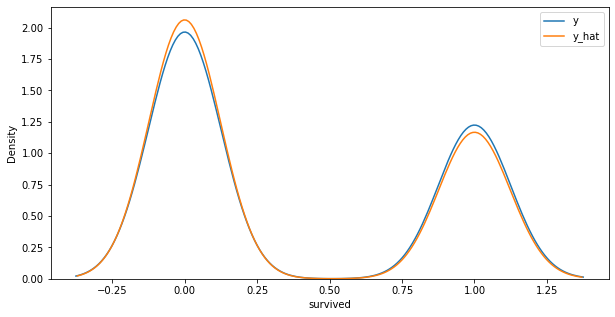

In [438]:
# 예측한 값 y_hat을 실제 값 y와 비교
import seaborn as sns # 시각화를 위해서 

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

In [439]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y, y_hat)  
print(svm_matrix)

[[484  65]
 [ 85 257]]


In [440]:
# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y, y_hat)            
print(svm_report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.80      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



In [443]:
df_test = pd.read_csv('/content/drive/MyDrive/data/titanic/test.csv')

# 열이름 소문자로 바꾸기
df_test.columns = map(str.lower, df_test.columns)

df_test

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [444]:
df_test.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [446]:
# age 변수 결측치 평균값으로 치환
mean_age = df_test['age'].mean()
print(mean_age)   # 30.272590361445783
print(df_test.age.isnull().sum())  # 86

df_test['age'].fillna(mean_age, inplace=True)
print(df_test.age.isnull().sum())   # 0

30.272590361445783
86
0


In [447]:
# cabin 변수 결측치 이웃하고 있는 주변의 데이터로 누락 데이터를 바꾸기
print(df_test.cabin.isnull().sum())  # 327
df_test['cabin'].fillna(method='bfill', inplace=True)  # 결측치 아래의 데이터로 채워넣는다.
df_test['cabin'].fillna(method='ffill', inplace=True)  # 결측치 위의 데이터로 채워넣는다.
print(df_test.cabin.isnull().sum())  # 0

327
0


In [451]:
# fare 변수 결측치 평균값으로 치환
mean_fare = df_test['fare'].mean()
print(mean_fare)   # 30.272590361445783
print(df_test.fare.isnull().sum())  # 86

df_test['fare'].fillna(mean_fare, inplace=True)
print(df_test.fare.isnull().sum())   # 0

35.6271884892086
1
0


In [452]:
df_test.isnull().sum()

passengerid    0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [455]:
# 분석에 활용할 열(속성)을 선택 
df_test2 = df_test[['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df_test2.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [456]:
# 경칭 정리 (https://rfriend.tistory.com/448, https://blog.naver.com/wideeyed/221603778414 참고)
df_test2['title'] = (df_test2.name.str.split(',').str[1]).str.split('.').str[0]    # expand=True 이면 여러개 컬럼으로 분할
print(df_test2.title.unique())    

[' Mr' ' Mrs' ' Miss' ' Master' ' Ms' ' Col' ' Rev' ' Dr' ' Dona']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']

In [434]:
# 예측에 활용할 열(속성)을 선택 
df_test2 = df_train[['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df_test2.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
